# LSTM Sign Language Detection by Avishake Adhikary

![Amity University](https://upload.wikimedia.org/wikipedia/en/thumb/d/df/Amity_University_Kolkata.svg/1200px-Amity_University_Kolkata.svg.png)

## Masters of Computer Applications
## Amity University Kolkata
#### Under the guidance of Prof. Soma Debnath



**LSTM MODEL**
1. Install and import dependencies
2. Keypoints using MP Holistic
3. Extract Keypoints
4. Setup Folders for Collection
5. Collect Keypoints Values for Training and Testing
6. Preprocess Data and Create Labels and Features
7. Build and Train LSTM Neural Network
8. Make Predictions
9. Save Weights
10. Evaluation using Confusion Matrix and Accuracy
11. Test in Real Time

# Install and Import Dependencies

In [103]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib tensorflowjs visualkeras pillow

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3


In [104]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Keypoints using MP Holistic

In [105]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [106]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR-CONVERSION BGR-to-RGB
    image.flags.writeable = False                  # Convert image to not-writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Convert image to writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR-COVERSION RGB-to-BGR
    return image, results

In [107]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [108]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [109]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [110]:
draw_landmarks(frame, results)

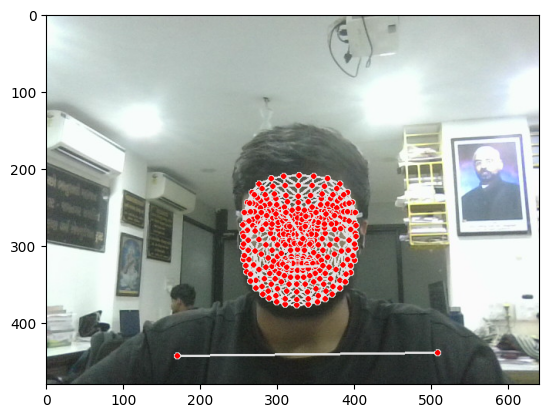

In [111]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [112]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

# Setup Folders for Collection

In [113]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['cat', 'food', 'help'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [114]:
signs = ['cat','food','help']

parent_folder = 'MP_Data'

if not os.path.exists(parent_folder):
    os.mkdir(parent_folder)
    for sign in signs:
        sign_folder = os.path.join(parent_folder, sign)
        os.mkdir(sign_folder)
        for i in range(30):
            subfolder = os.path.join(sign_folder, str(i))
            os.mkdir(subfolder)


# Collect Keypoint Values for Training and Testing

In [115]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [116]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data and Create Labels and Features

In [117]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [118]:
label_map = {label:num for num, label in enumerate(actions)}

In [119]:
label_map

{'cat': 0, 'food': 1, 'help': 2}

In [120]:
sequences, labels = [], []

for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        folder_path = os.path.join(DATA_PATH, action, str(sequence))
        files = os.listdir(folder_path)

        # Skip if not all frames are present
        if len(files) < sequence_length:
            print(f"Skipping incomplete sequence: {folder_path}")
            continue

        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(folder_path, f"{frame_num}.npy"))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


Skipping incomplete sequence: MP_Data\cat\1
Skipping incomplete sequence: MP_Data\cat\10
Skipping incomplete sequence: MP_Data\cat\11
Skipping incomplete sequence: MP_Data\cat\12
Skipping incomplete sequence: MP_Data\cat\13
Skipping incomplete sequence: MP_Data\cat\14
Skipping incomplete sequence: MP_Data\cat\15
Skipping incomplete sequence: MP_Data\cat\16
Skipping incomplete sequence: MP_Data\cat\17
Skipping incomplete sequence: MP_Data\cat\18
Skipping incomplete sequence: MP_Data\cat\19
Skipping incomplete sequence: MP_Data\cat\2
Skipping incomplete sequence: MP_Data\cat\20
Skipping incomplete sequence: MP_Data\cat\21
Skipping incomplete sequence: MP_Data\cat\22
Skipping incomplete sequence: MP_Data\cat\23
Skipping incomplete sequence: MP_Data\cat\24
Skipping incomplete sequence: MP_Data\cat\25
Skipping incomplete sequence: MP_Data\cat\26
Skipping incomplete sequence: MP_Data\cat\27
Skipping incomplete sequence: MP_Data\cat\28
Skipping incomplete sequence: MP_Data\cat\29
Skipping inc

In [121]:
X = np.array(sequences)

In [122]:
y = to_categorical(labels).astype(int)

In [123]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

sequences, labels = [], []

# Determine feature dimension from the first valid frame
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    for sequence in os.listdir(action_path):
        folder_path = os.path.join(action_path, sequence)
        frame_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('.')[0]))
        if len(frame_files) == 0:
            continue
        first_frame = np.load(os.path.join(folder_path, frame_files[0]))
        feature_dim = first_frame.shape[0]
        break
    break  # we only need one frame to get feature_dim

# Process all sequences
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    for sequence in os.listdir(action_path):
        folder_path = os.path.join(action_path, sequence)
        frame_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('.')[0]))

        window = []
        for frame_num in range(sequence_length):
            frame_path = os.path.join(folder_path, f"{frame_num}.npy")
            if os.path.exists(frame_path):
                frame = np.load(frame_path)
                # Pad frame if its size is smaller than feature_dim
                if frame.shape[0] < feature_dim:
                    pad = np.zeros(feature_dim - frame.shape[0])
                    frame = np.concatenate([frame, pad])
                window.append(frame)
            else:
                # Missing frame: pad with zeros
                window.append(np.zeros(feature_dim))

        sequences.append(window)
        labels.append(label_map[action])

# Convert to numeric arrays
X = np.array(sequences, dtype=np.float32)  # (num_sequences, sequence_length, feature_dim)
y = np.array(labels)

print("X shape:", X.shape, "y shape:", y.shape)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)



X shape: (90, 30, 1662) y shape: (90,)
X_train: (72, 30, 1662) X_test: (18, 30, 1662)
y_train: (72,) y_test: (18,)


# Build and Train LSTM Neural Network

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [125]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
#While training access tensorboard
#tensorboard --logdir=.

In [126]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [127]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [128]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import datetime
import numpy as np

# 1️⃣ Determine dataset parameters
sequence_length = X_train.shape[1]   # number of frames per sequence
feature_dim = X_train.shape[2]       # features per frame
num_classes = len(actions)           # total number of action classes

# 2️⃣ One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# 3️⃣ Define LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(sequence_length, feature_dim)))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 4️⃣ Define TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# 5️⃣ Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=200,         # adjust epochs based on dataset size
    batch_size=32,      # adjust batch size if needed
    callbacks=[tb_callback]
)

# 6️⃣ Print dataset shapes for verification
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train_cat.shape, "y_test:", y_test_cat.shape)


Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step - accuracy: 0.3750 - loss: 1.0969 - val_accuracy: 0.4444 - val_loss: 1.0646
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.4444 - loss: 1.0799 - val_accuracy: 0.4444 - val_loss: 1.0365
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.4444 - loss: 1.0691 - val_accuracy: 0.4444 - val_loss: 1.0142
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.4444 - loss: 1.0559 - val_accuracy: 0.4444 - val_loss: 0.9722
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4444 - loss: 1.0384 - val_accuracy: 0.4444 - val_loss: 0.9357
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4444 - loss: 1.0308 - val_accuracy: 0.4444 - val_loss: 0.8949
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.3611 - loss: 1.0400 - val_accuracy: 0.4444 - val_loss: 0.8891
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.4444 - loss: 1.0267 - val_accuracy: 0.4444 - val_lo

In [129]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,438,475 (5.49 MB)

 Trainable params: 479,491 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 958,984 (3.66 MB)

C:\Users\gautam bhanushali\AppData\Roaming\Python\Python312\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


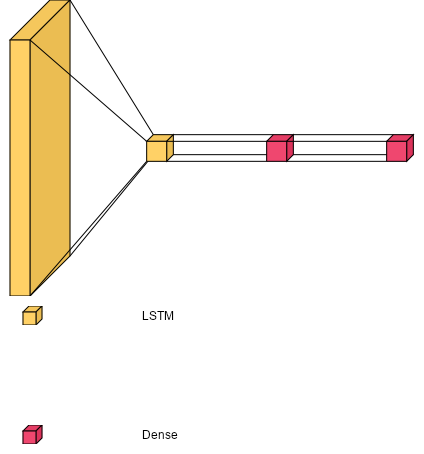

In [130]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font,spacing=100)

# Make Predictions

In [131]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


In [132]:
actions[np.argmax(res[4])]

'cat'

In [133]:
actions[np.argmax(y_test[4])]

'cat'

# Save Weights

In [134]:
import os
print(os.getcwd())

import os
print(os.path.exists('./model.weights.h5'))  # Should print True

model.save_weights('./model.weights.h5')  # filename must end with .weights.h5


c:\Users\gautam bhanushali\Desktop\Sign Language\Realtime-Sign-Language-Detection-Using-LSTM-Model
True


In [135]:
from tensorflow.keras.models import load_model

# Load full model
loaded_model = load_model('./model.h5')

# OR load architecture first and then weights
loaded_model.load_weights('./model.weights.h5')


c:\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [136]:
del model

In [137]:
import tensorflow as tf
model = tf.keras.models.load_model('model.h5')

In [138]:
# Save the full model
model.save(r"C:\Users\gautam bhanushali\Desktop\Sign Language\Realtime-Sign-Language-Detection-Using-LSTM-Model\model.h5")

# Load the full model
from tensorflow.keras.models import load_model
loaded_model = load_model(r"C:\Users\gautam bhanushali\Desktop\Sign Language\Realtime-Sign-Language-Detection-Using-LSTM-Model\model.h5")


# Evaluation using Confusion Matrix

In [139]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [140]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


In [141]:
# 1️⃣ Make predictions
yhat_cat = model.predict(X_test)  # shape: (num_samples, num_classes)

# 2️⃣ Convert one-hot to class indices
ytrue = np.argmax(y_test_cat, axis=1).tolist()
yhat = np.argmax(yhat_cat, axis=1).tolist()

# 3️⃣ Optional: check first 10 predictions
print("ytrue:", ytrue[:10])
print("yhat:", yhat[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
ytrue: [1, 0, 1, 2, 0, 0, 1, 2, 0, 1]
yhat: [0, 2, 0, 2, 0, 0, 2, 0, 0, 0]


In [142]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[ 5,  5],
        [ 3,  5]],

       [[12,  0],
        [ 6,  0]],

       [[ 9,  5],
        [ 1,  3]]], dtype=int64)

In [143]:
accuracy_score(ytrue, yhat)

0.4444444444444444

# Realtime Test

In [144]:
from scipy import stats

In [145]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [146]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [147]:
!pip install numpy --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.3.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.3-cp312-cp312-win_amd64.whl (12.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.20 requires numpy<2, but you have numpy 2.3.3 which is incompatible.
pandas 2.2.1 requires numpy<2,>=1.26.0; python_version >= "3.12", but you have numpy 2.3.3 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.3 which is incompatible.
tensorflow-intel 2.16.1 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.3.3 which is incompatible.


In [148]:
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf

# Actions
actions = ['hello', 'thanks', 'iloveyou']

# Mediapipe setup
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Threshold for predictions
threshold = 0.5

# Functions
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

def draw_styled_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

def extract_keypoints(results):
    pose = np.array([[lmk.x, lmk.y, lmk.z, lmk.visibility] for lmk in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[lmk.x, lmk.y, lmk.z] for lmk in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[lmk.x, lmk.y, lmk.z] for lmk in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[lmk.x, lmk.y, lmk.z] for lmk in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

# Load model (full model, safer than separate weights)
model_path = r"C:\Users\gautam bhanushali\Desktop\Sign Language\Realtime-Sign-Language-Detection-Using-LSTM-Model\model.h5"
model = tf.keras.models.load_model(model_path)
model.summary()

# Detection variables
sequence = []
sentence = []
predictions = []

# Webcam feed
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Extract keypoints
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # sliding window
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))
            
            # Consistent predictions logic
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) == 0 or actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
        
        if len(sentence) > 5:
            sentence = sentence[-5:]
        
        # Display sentence
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show image
        cv2.imshow('Realtime LSTM Sign Language Detection', image)
        
        # Break loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,493 (1.83 MB)

 Trainable params: 479,491 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━